# Центральная предельная теорема своими руками

- Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). 
- Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. 
- Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 
- Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. 
- Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).
- Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

Для выполнения задания используем логнормальное распределение: https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

Сгенерируем выборку объема 1000 и построим гистограмму выборки + теоретическую плотность распределения

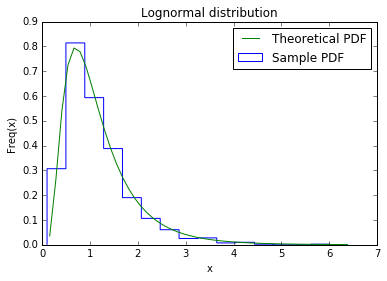

In [320]:
lvar = sts.lognorm(0.6)       # определяем функцию распределения с параметром shape = 0.6
lsample = lvar.rvs(1000)      # генерируем выборку случайных величин с заданным распределением размера 1000

plt.hist(lsample, normed=True, bins = 15, histtype='step', label='Sample PDF')       # строим гистограмму получившеся выборки

x = np.linspace(lvar.ppf(0.001), lvar.ppf(0.999), 50)       # фиксируем область определения теоретической плотности распределения
pdf = lvar.pdf(x)                                           # определяем функцию теоретической плотности распределения
plt.plot(x, pdf, label='Theoretical PDF')                   # строим на графике теоретическую функцию плотности распределения

plt.legend()
plt.title('Lognormal distribution')
plt.xlabel('x')
plt.ylabel('Freq(x)')


В этом блоке задается функция плотности нормального распределения, которая в дальнейшем будет аппроксимировать наши выборочные данные

In [321]:
Tmean = lvar.mean()                                      # вычисляем мат. ожидание для нормального распределения
Tvar = lvar.var()/1000                                   # вычисляем дисперсию нормального распределения
Tnorm = sts.norm(Tmean, np.sqrt(Tvar))                   # определяем аппроксимирующую функцию нормального распределения 
x = np.linspace(Tnorm.ppf(0.001), Tnorm.ppf(0.999), 50)  # задаем интервал для ее построения
Tpdf = Tnorm.pdf(x)                                      # задаем функцию плотности распределения


В этом блоке генерируем 1000 выборок по 10 элементов и смотрим, как распределение средних по выборкам соотносится с аппроксимирующей функцией плотности нормального распределения

Дисперсия выборки = 0.0602, Дисперсия аппроксимирующей функции = 0.0006
Матожидание выборки = 1.2, Матожидание аппроксимирующей функции = 1.2


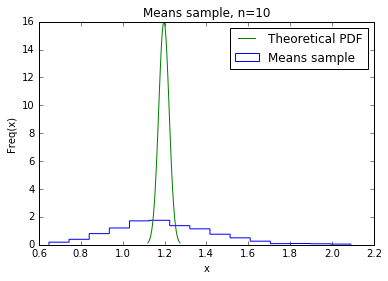

In [328]:
A5 = np.empty((1000,10))                                   # создаем пустой массив для будущих данных

for i in np.arange(1000):
    A5[i] = lvar.rvs(10)                                   # заполняем массив случайными величинами с заданными параметрами распределения

mean5S = [A5[i].sum()/10.0 for i in np.arange(1000)]                                   # создаем массив из средних по выборкам

plt.hist(mean5S, normed=True, bins = 15, histtype='step', label='Means sample')        # строим гистограмму
plt.plot(x, Tpdf, label='Theoretical PDF')                                             # строим аппроксимирующую функцию

plt.legend()
plt.title('Means sample, n=10')
plt.xlabel('x')
plt.ylabel('Freq(x)')

print 'Дисперсия выборки = ' + str(round(np.array(mean5S).var(),4)) +', Дисперсия аппроксимирующей функции = ' + str(round(Tvar,4))
print 'Матожидание выборки = ' + str(round(np.array(mean5S).mean(),2)) +', Матожидание аппроксимирующей функции = ' + str(round(Tmean, 2))   

Вывод: при размере выборок n=10 матожидание выборки совпадает с матожиданием аппроксимирующей функции распределения, а выборочная дисперсия в 100 раз превосходит дисперсию аппроксимирующей функции, что видно на графике в виде расползшейся гистограммы. Аппроксимация получилась крайне грубой.

В этом блоке генерируем 1000 выборок по 100 элементов и смотрим, как распределение средних по выборкам соотносится с аппроксимирующей функцией плотности нормального распределения

Дисперсия выборки = 0.0063, Дисперсия аппроксимирующей функции = 0.0006
Матожидание выборки = 1.19, Матожидание аппроксимирующей функции = 1.2


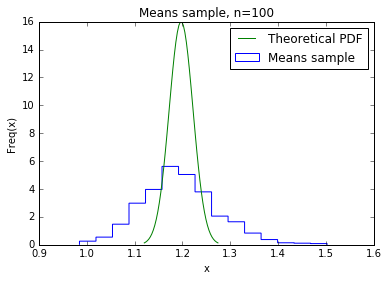

In [336]:
A10 = np.empty((1000,100))

for i in np.arange(1000):
    A10[i] = lvar.rvs(100)

mean10S = [A10[i].sum()/100.0 for i in np.arange(1000)]

plt.hist(mean10S, normed=True, bins = 15, histtype='step', label='Means sample')
plt.plot(x, Tpdf, label='Theoretical PDF')

plt.legend()
plt.title('Means sample, n=100')
plt.xlabel('x')
plt.ylabel('Freq(x)')

print 'Дисперсия выборки = ' + str(round(np.array(mean10S).var(),4)) +', Дисперсия аппроксимирующей функции = ' + str(round(Tvar,4))
print 'Матожидание выборки = ' + str(round(np.array(mean10S).mean(),2)) +', Матожидание аппроксимирующей функции = ' + str(round(Tmean, 2))   

Вывод: при размере выборок n=100 матожидание выборки совпадает с матожиданием аппроксимирующей функции распределения, а выборочная дисперсия в 10 раз превосходит дисперсию аппроксимирующей функции. Это уже лучше, чем в предыдущем случае, но все равно пока не очень точно. 

В этом блоке генерируем 1000 выборок по 500 элементов и смотрим, как распределение средних по выборкам соотносится с аппроксимирующей функцией плотности нормального распределения

Дисперсия выборки = 0.0013, Дисперсия аппроксимирующей функции = 0.0006
Матожидание выборки = 1.2, Матожидание аппроксимирующей функции = 1.2


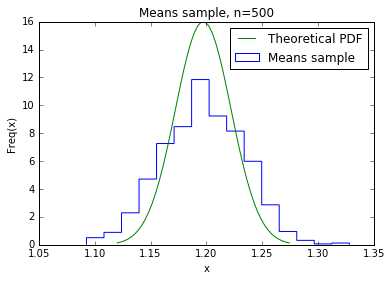

In [337]:
A50 = np.empty((1000,500))

for i in np.arange(1000):
    A50[i] = lvar.rvs(500)

mean50S = [A50[i].sum()/500.0 for i in np.arange(1000)]

plt.hist(mean50S, normed=True, bins = 15, histtype='step', label='Means sample')
plt.plot(x, Tpdf, label='Theoretical PDF')

plt.legend()
plt.title('Means sample, n=500')
plt.xlabel('x')
plt.ylabel('Freq(x)')

print 'Дисперсия выборки = ' + str(round(np.array(mean50S).var(),4)) +', Дисперсия аппроксимирующей функции = ' + str(round(Tvar,4))
print 'Матожидание выборки = ' + str(round(np.array(mean50S).mean(),2)) +', Матожидание аппроксимирующей функции = ' + str(round(Tmean, 2))   

Вывод: при размере выборок n=500 выборочная дисперсия превосходит дисперсию аппроксимирующей функции уже только вдвое. Аппроксимация получается гораздо более точной. 

В последнем блоке генерируем 1000 выборок по 1000 элементов

Дисперсия выборки = 0.0006, Дисперсия аппроксимирующей функции = 0.0006
Матожидание выборки = 1.2, Матожидание аппроксимирующей функции = 1.2


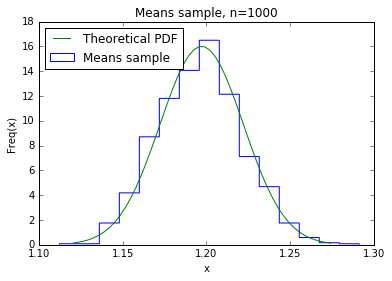

In [341]:
A = np.empty((1000,1000))

for i in np.arange(1000):
    A[i] = lvar.rvs(1000)

meanS = [A[i].sum()/1000.0 for i in np.arange(1000)]

plt.hist(meanS, normed=True, bins = 15, histtype='step', label='Means sample')
plt.plot(x, Tpdf, label='Theoretical PDF')

plt.legend(loc = 'upper left')
plt.title('Means sample, n=1000')
plt.xlabel('x')
plt.ylabel('Freq(x)')

print 'Дисперсия выборки = ' + str(round(np.array(meanS).var(),4)) +', Дисперсия аппроксимирующей функции = ' + str(round(Tvar,4))
print 'Матожидание выборки = ' + str(round(np.array(meanS).mean(),2)) +', Матожидание аппроксимирующей функции = ' + str(round(Tmean, 2))   

В данном случае нормальное распределение аппроксимирует распределение по выборке идеально, практически совпадают как матожидания, так и дисперсии.